In [2]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import cv2

from tabulate import tabulate
import glob
from PIL import Image
from PIL.Image import Image as PilImage
import textwrap

In [3]:
PATH = "/Users/eugeneolkhovik/python_files/ML/melanoma/archive"

In [4]:
df = pd.read_csv(os.path.join(PATH, 'ISIC_2019_Training_Metadata.csv'))

In [5]:
melanoma = pd.read_csv(os.path.join(PATH, 'ISIC_2019_Training_GroundTruth.csv'))

In [6]:
df

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [7]:
df.shape

(25331, 5)

In [8]:
top = 5
print(tabulate(
    sorted(list(zip(df.columns, df.isnull().sum(), df.isnull().sum() / df.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name               null_cnt    null_perc
-------------------  ----------  -----------
anatom_site_general        2631     10.3865
lesion_id                  2084      8.22707
age_approx                  437      1.72516
sex                         384      1.51593
image                         0      0


<AxesSubplot:>

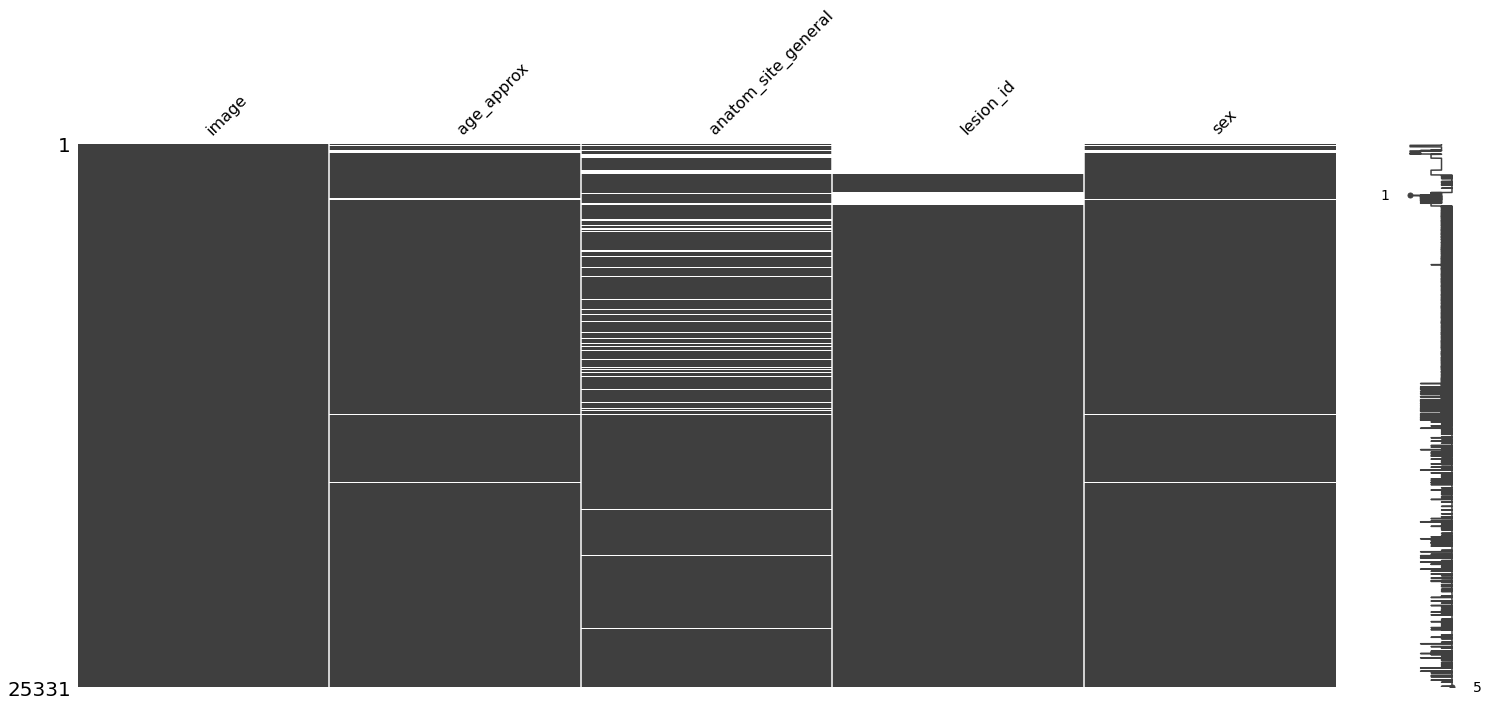

In [9]:
msno.matrix(df)

In [10]:
df.anatom_site_general.value_counts()

anterior torso     6915
lower extremity    4990
head/neck          4587
upper extremity    2910
posterior torso    2787
palms/soles         398
oral/genital         59
lateral torso        54
Name: anatom_site_general, dtype: int64

In [11]:
df.age_approx.value_counts()


45.0    2585
50.0    2489
40.0    2246
55.0    2170
70.0    2120
65.0    2075
60.0    2036
75.0    1796
35.0    1651
80.0    1459
85.0    1319
30.0    1199
25.0     677
20.0     388
15.0     375
10.0     142
5.0      113
0.0       54
Name: age_approx, dtype: int64

In [12]:
df.sex = df.sex.map({'female': 0, 'male': 1})

<AxesSubplot:xlabel='sex', ylabel='Count'>

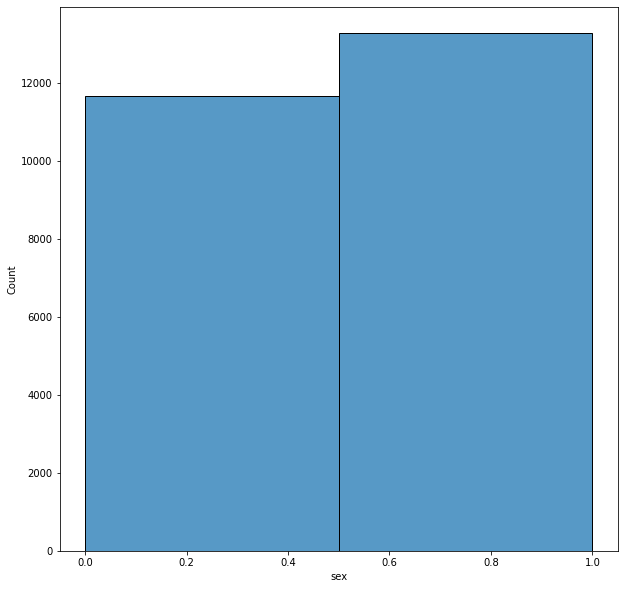

In [13]:
plt.figure(figsize=(10,10))
sns.histplot(df.sex,bins=2)

In [14]:
df.sex.value_counts(normalize= True)

1.0    0.532569
0.0    0.467431
Name: sex, dtype: float64

<AxesSubplot:xlabel='age_approx', ylabel='Count'>

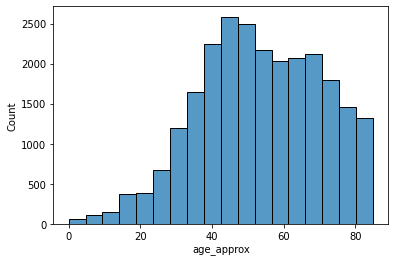

In [15]:
sns.histplot(df.age_approx, bins=18)

In [16]:
df.lesion_id.value_counts() 

BCN_0001728    31
BCN_0003369    27
BCN_0001321    26
BCN_0003196    24
BCN_0001954    21
               ..
HAM_0004690     1
HAM_0005816     1
HAM_0004358     1
HAM_0007078     1
HAM_0001067     1
Name: lesion_id, Length: 11847, dtype: int64

In [17]:
leison_withoutnan = df.lesion_id.dropna(axis = 0,inplace = False)

In [18]:
leison_withoutnan[leison_withoutnan.duplicated() == True]

1711     MSK4_0010029
1743     MSK4_0010026
1826     MSK4_0010011
1854     MSK4_0010006
1994     MSK4_0010019
             ...     
25326     BCN_0003925
25327     BCN_0001819
25328     BCN_0001085
25329     BCN_0002083
25330     BCN_0001079
Name: lesion_id, Length: 11400, dtype: object

In [20]:
list_a =  df.image[df.lesion_id == 'BCN_0001728'].values
list_a =[s + '.jpg' for s in list_a]

In [21]:
path = os.path.join(PATH,'ISIC_2019_Training_Input/ISIC_2019_Training_Input')
dirs = os.listdir( path )

In [22]:
size = (200,200)
list_im = []
new_image = Image.new('RGB', (360, 360))
for file in dirs:
    if file in list_a:
        im = Image.open(os.path.join(path,file))
        im = im.resize(size)
        list_im.append(im)
        
        
        
        

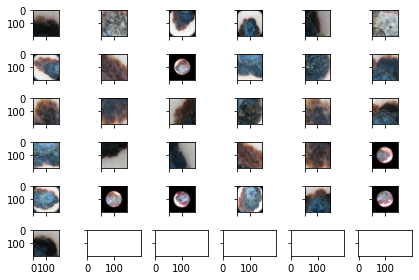

In [23]:
figure, axs = plt.subplots(6, 6, sharex=True, sharey=True)
for i in range(6):
        for j in range(6):
            if i*6+j > 30:
                break
            image = list_im[i*6+j]
            axs[i, j].imshow(image)
plt.tight_layout()


<Figure size 1080x720 with 0 Axes>

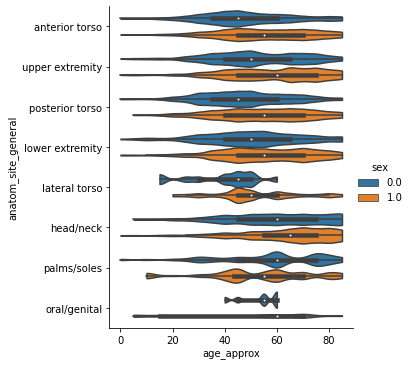

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x="age_approx", y="anatom_site_general", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=df)
plt.show()

In [25]:
df[['age_approx', 'anatom_site_general']].groupby(['anatom_site_general'], as_index=False).mean()

,anatom_site_general,age_approx
0,anterior torso,52.570217
1,head/neck,61.633523
2,lateral torso,47.888889
3,lower extremity,52.300323
4,oral/genital,50.932203
5,palms/soles,55.852417
6,posterior torso,51.827485
7,upper extremity,55.222454


In [26]:
df[['age_approx', 'anatom_site_general']].groupby(['anatom_site_general'], as_index=False).mean()

,anatom_site_general,age_approx
0,anterior torso,52.570217
1,head/neck,61.633523
2,lateral torso,47.888889
3,lower extremity,52.300323
4,oral/genital,50.932203
5,palms/soles,55.852417
6,posterior torso,51.827485
7,upper extremity,55.222454


In [27]:
df[["image", "lesion_id"]].to_csv(path_or_buf=os.path.join(PATH,'lesion.csv'), header =True,index=False, encoding = "ISO-8859-1")

# Melanoma dataframe

In [28]:
melanoma

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
melanoma.columns[1:]

Index(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')

In [30]:
melanoma.sum()[1:]

MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: object

# Merge to dataframes

In [31]:
merged = pd.merge(df, melanoma, on='image',how='outer')

In [32]:
df.anatom_site_general.value_counts()

anterior torso     6915
lower extremity    4990
head/neck          4587
upper extremity    2910
posterior torso    2787
palms/soles         398
oral/genital         59
lateral torso        54
Name: anatom_site_general, dtype: int64

In [33]:
merged

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,55.0,anterior torso,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,anterior torso,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,upper extremity,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,30.0,upper extremity,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,80.0,posterior torso,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
merged[['anatom_site_general', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']].groupby(['anatom_site_general'], as_index=False).sum()

,anatom_site_general,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,anterior torso,1331.0,3699.0,1114.0,92.0,445.0,43.0,78.0,113.0,0.0
1,head/neck,880.0,767.0,1131.0,598.0,1001.0,0.0,36.0,174.0,0.0
2,lateral torso,14.0,34.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
3,lower extremity,796.0,2876.0,462.0,66.0,412.0,138.0,58.0,182.0,0.0
4,oral/genital,19.0,24.0,0.0,0.0,14.0,0.0,2.0,0.0,0.0
5,palms/soles,201.0,168.0,0.0,6.0,7.0,0.0,3.0,13.0,0.0
6,posterior torso,430.0,1888.0,186.0,4.0,230.0,2.0,22.0,25.0,0.0
7,upper extremity,724.0,1325.0,358.0,79.0,234.0,52.0,23.0,115.0,0.0
